# Sentiment Analysis Using Fasttext
### A sentimental analysis classify comment written in English
### Badri Ahmed
___

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TheData.csv')
data.head()

,Content,Rate
0,un endroit très calme pour réviser seul ou en ...,2.0
1,"Je vais souvent à Kraft, j'aime bien le servic...",4.0
2,Ca reste toujours le dernier choix :D il faut ...,1.0
3,Une ambiance agréable dans cet endroit. Mais c...,2.0
4,Un endroit très sympa pour passer un beau temp...,0.0


In [3]:
for index, row in data.iterrows():
    if row['Rate']>3:
        data.at[index,'Sentiment']='Positive'
    elif row['Rate'] == 3 :
        data.at[index,'Sentiment']='Neutral'
    else :
        data.at[index,'Sentiment']='Negative'

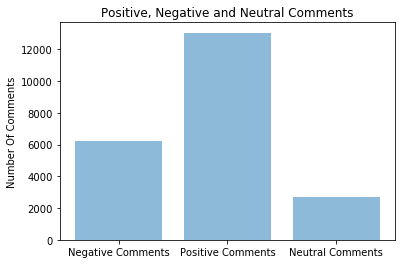

[6254, 13057, 2687]


In [4]:
objects = ('Negative Comments', 'Positive Comments','Neutral Comments')
y_pos = np.arange(len(objects))
performance = [len(data.loc[data.Sentiment=="Negative"]),len(data.loc[data.Sentiment=="Positive"]),len(data.loc[data.Sentiment=="Neutral"])]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number Of Comments')
plt.title('Positive, Negative and Neutral Comments')
 
plt.show()
print(performance)

In [5]:
def Upper(text):
    text = str(text)
    text=text.lower()
    return text

In [6]:
data.Content = data.Content.apply(Upper)

In [7]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split



# separate minority and majority classes
Positive = data[data.Sentiment=='Positive']
Negative = data[data.Sentiment=='Negative']
Neutral = data[data.Sentiment=='Neutral']

# upsample minority
Neg_upsampled = resample(Negative,
                          replace=True, # sample with replacement
                          n_samples=len(Positive), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Positive, Neg_upsampled])

# check new class counts
upsampled.Sentiment.value_counts()


Negative    13057
Positive    13057
Name: Sentiment, dtype: int64

In [10]:
frames = [upsampled, Neutral]
data = pd.concat(frames)
data.reset_index(drop=True,inplace=True)

In [11]:
data.tail()

,Content,Rate,Sentiment
28796,"beaucoup de monde , il fait bon être vu au con...",3.0,Neutral
28797,diner où j'étais invitée. ai pris une excellen...,3.0,Neutral
28798,les plats sont copieux et bon mais le service ...,3.0,Neutral
28799,bien l été en terrasse mais enfumé à l intérie...,3.0,Neutral
28800,"on y mange bien, cadre agréable, il faut évite...",3.0,Neutral


In [16]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt; plt.rcdefaults()

import re
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize as wt
from nltk.stem import PorterStemmer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk import pos_tag
#from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer


In [17]:
from nltk import RegexpTokenizer
toknizer = RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')

In [18]:
def FrTokenisation(text):
    tokenized_text=toknizer.tokenize(text)
    return tokenized_text

In [19]:
#Here, we import french stop words and add buissness related items
def getStopWordList():
    #read the stopwords file and build a list
    stopWords = []
    stopWords = get_stop_words('french')
    BusinessWords=['vynd',"cest","est","a",'ca',
                   "bar","restaurant","jai","oui","non",'c','happy',
                   'hour','happyhour','fast','food','fastfood','plat']
    return BusinessWords + stopWords

In [20]:
stopWord=getStopWordList()
def StopWordsAlphaText(tokenized_text):
    filtred_text=[]
    for word in tokenized_text:
        #strip punctuation
        word = word.strip('\'"?,.')
        #check if the word starts with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", word)
        #ignore if it is a stop word or val is none
        if(word not in stopWord and val is not None):
            filtred_text.append(word)
    return filtred_text

In [21]:
for index,row in data.iterrows():
    string=""
    Upper_text = Upper(row['Content'])
    Token_text = FrTokenisation(Upper_text)
    Filtered_text = StopWordsAlphaText(Token_text)
    #Lemmatized_text = FrenchLemmatizer(Filtered_text)
    #Lemmatized_text = FrenchStem(Filtered_text)
    for item in Filtered_text:
        string=string + " " + item
    #print(len(data)-index)
    data.loc[index,"Final_text"]=string

In [22]:
def Filter(text):
    text = str(text)
    string=""
    Upper_text = Upper(text)
    Token_text = FrTokenisation(Upper_text)
    Filtered_text = StopWordsAlphaText(Token_text)
    #Lemmatized_text = FrenchLemmatizer(Filtered_text)
    #Lemmatized_text = FrenchStem(Filtered_text)
    for item in Filtered_text:
        string=string + " " + item
    #print(len(data)-index)
    return string

In [23]:
Filter('Espace très mal fréquenté. Personnel pas du tout sympathique. A éviter surtout pendant le weekend')

' espace mal personnel sympathique surtout pendant weekend'

In [24]:
fasttext_data = Path("fasttext_dataset.txt")
train_data = Path('train.txt')
test_data=Path('test.txt')

In [25]:
output = fasttext_data.open("w")
train_output=train_data.open("w")
test_output=test_data.open("w")
percent_test_data = 0.10
for index,row in data.iterrows():
    review_data = row['Final_text']

    rating = row['Rate']
    text = str(review_data).replace("\n", " ")

    fasttext_line = "__label__{} {}".format(rating, review_data)

    output.write(fasttext_line + "\n")
    if random.random() <= percent_test_data:
        test_output.write(fasttext_line + "\n")
    else:
        train_output.write(fasttext_line + "\n")

In [86]:
output = fasttext_data.open("w")
train_output=train_data.open("w")
test_output=test_data.open("w")
for index,row in data.iterrows():
    review_data = row['Final_text']
    rating = row['Rate']
    text = str(review_data).replace("\n", " ")

    fasttext_line = "__label__{} {}".format(rating, review_data)

    output.write(fasttext_line + "\n")
    train_output.write(fasttext_line + "\n")

In [27]:
output = fasttext_data.open("w")

In [28]:
!pip install fasttext

In [87]:
import fasttext

model = fasttext.train_supervised('train.txt',epoch=200,wordNgrams=10)

In [46]:
model.save_model('model.bin')

In [88]:
print(model.words)
print(model.labels)

['</s>', 'service', 'bien', 'prix', 'plats', 'plus', 'bonne', 'cuisine', 'accueil', 'nourriture', 'endroit', 'personnel', 'cadre', 'repas', 'vraiment', 'serveur', 'terrasse', 'ambiance', 'vue', 's', 'serveurs', 'carte', 'manger', 'table', 'excellent', 'rien', 'rapport', 'sympa', 'menu', 'cher', 'salade', 'petit', 'mer', 'surtout', 'belle', 'rapide', 'super', 'beaucoup', 'toujours', 'mal', 'tres', 'resto', 'recommande', 'pris', 'frais', 'hammamet', 'poisson', 'place', 'assez', 'faut', 'sympathique', 'choix', 'chaleureux', 'aller', 'magnifique', 'entre', 'bons', 'attente', 'temps', 'autres', 'jamais', 'dire', 'seul', 'vin', 'dessert', 'servi', 'tunis', 'prendre', 'amis', 'mieux', 'soir', 'clients', 'monde', 'avis', 'verre', 'bouffe', 'mauvais', 'moment', 'top', 'brasserie', 'lieu', 'eau', 'produits', 'serveuse', 'pizza', 'grand', 'correct', 'fruits', 'frites', 'meilleur', 'maison', 'toute', 'commande', 'assiette', 'excellente', 'ville', 'touristes', 'lille', 'reste', 'dit', 'mauvaise', '

In [89]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('test.txt'))

N	0
P@1	nan
R@1	nan


In [90]:
def Predict (text):
    text = str(text)
    x=model.predict(text)
    return str(x[0])[11:14]

In [92]:
Predict("excellente pizza et hamburger. mais carte limitee")

'5.0'

In [93]:
Predict("bon plan du mois dÂ’aout: le factory marsa  places disponibles avec service rapide avant le retour des vacanciers. salade factory 10 dt excellent rapport qualite / prix suivant le lieu. la 2eme photo hoso maki concombre fromage avec sauce soja env. 4dt")

'4.0'

In [94]:
Predict("la soirée fut réellement incroyable.le patron est extrêmement malpoli - me faire tutoyer à 35 ans alors que je voyais bien que j'étais en train de me faire gruger est assez désagréable. appeler toutes les femmes du restaurant est au demeure assez pathétique.la vaisselle est salle (couverts dégu....lasses, assiettes pareil) ce qui est absolument fou dans un restaurantet qui plus est la nourriture est mauvaisene venez que si vous voulez faire un reportage sur les pires endroits de paris!")

'1.0'

In [95]:
Predict("excellent")

'3.6'

In [96]:
Predict("null")

'1.0'

In [97]:
Predict('service null')

'2.0'

In [98]:
Predict('le meilleur restaurant :)')

'5.0'

In [99]:
Predict('pizza trés delicieuse, mais la musique est trop élevée')

'4.0'

In [100]:
Predict('Rien ne marche cest catastrophique')

'2.4'

In [101]:
Predict('mauvais')

'1.0'